# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
dim = (128, 128)

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * dim[0])

# Seed
seed = 42

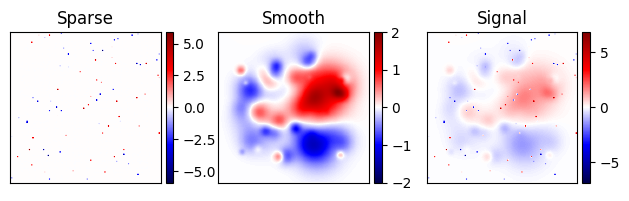

In [4]:
sparse_signal = compute_sparse(dim, sparse_range, density, seed)
smooth_signal = compute_smooth(dim, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal
plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(dim, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

pnsr = 50 # 10, 20 0.05 - 0.1  pour lambda 1
y = compute_y(y0, pnsr)

# Solver

In [8]:
from pyxu.operator import Laplacian

# Loss weights
lambda1 = 1
lambda2 = 1

coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, Laplacian(dim))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-10-28 17:33:35.116432] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-10-28 17:33:50.973717] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0029483112827626045
INFO -- [2023-10-28 17:34:06.946569] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.000948747584709656
INFO -- [2023-10-28 17:34:22.812201] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.00025477723276488135
INFO -- [2023-10-28 17:34:31.949651] Iteration 1_791
	iteration: 1791
	N_iter: 1792.0
	RelError[x]: 9.999950476489812e-05
INFO -- [2023-10-28 17:34:31.950591] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x14f3bd5a0>


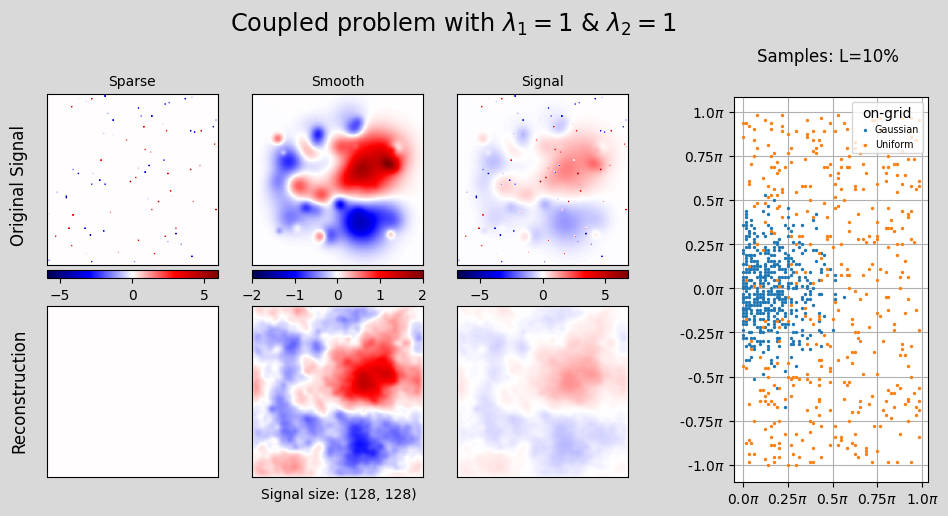

Button(description='SAVE', style=ButtonStyle())

Output()

In [9]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape(dim), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op)